# Importing libraries and data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from  sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, roc_auc_score, roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [16]:
train_path = 'mnist_train.csv'
test_path = 'mnist_test.csv'

In [17]:
mnist_train = pd.read_csv(train_path)
mnist_test = pd.read_csv(test_path)

# Exploring Data

In [18]:
mnist_train.head(3)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
mnist_train.shape

(60000, 785)

In [20]:
mnist_train.isnull().sum().sum()

0

In [21]:
mnist_train['label'].value_counts().sort_index()

label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

so as first step defining the problem : the problem is to make the model to know the number by the pixels he got so it is a classify problem

the second step of choosing measure of success i see that accuracy_score will be okay as the data is not biased to any number more than the others so we don't need f1_score and there is no big problem or risk on prediction of false negative or false positive to choose recall or precision

In [22]:
from sklearn.metrics  import accuracy_score

# Data spliting

In [23]:
features = mnist_train.drop(columns = ['label']).copy()

In [24]:
x_train, x_valid, y_train, y_valid = train_test_split(features,mnist_train['label'] , train_size = 0.7,shuffle=True)

In [25]:
x_valid.shape

(18000, 784)

# Model expriments

In [36]:
y_valid.value_counts().sort_index()

label
0    1792
1    2019
2    1800
3    1839
4    1756
5    1653
6    1806
7    1786
8    1773
9    1776
Name: count, dtype: int64

## Logistic Learn

In [26]:
lr = LogisticRegression(C=0.5,max_iter=100,random_state=42)
lr.fit(x_train,y_train)

y_valid_pred_lr = lr.predict(x_valid)
accuracy_score(y_valid,y_valid_pred_lr)

C:\Users\mafia\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9173888888888889

In [27]:
y_train_pred_lr = lr.predict(x_train)
accuracy_score(y_train,y_train_pred_lr)

0.9361666666666667

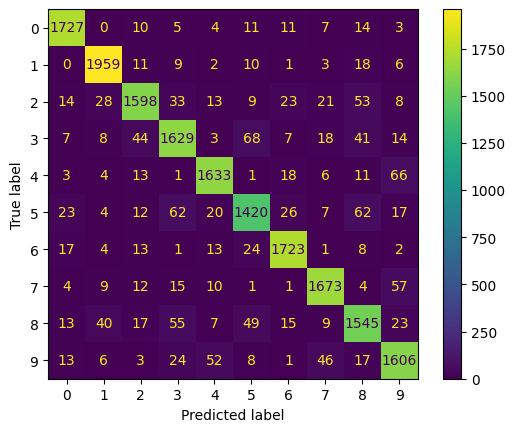

In [28]:
confusion_matrix_lr = confusion_matrix(y_valid, y_valid_pred_lr)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr)

cm_display.plot()
plt.show()

## Random Forest

In [29]:
pipe = Pipeline([("regressor",RandomForestClassifier())])
param_grid = {
    "regressor":[RandomForestClassifier()],
    "regressor__n_estimators":[10,50,100],
    "regressor__criterion":['gini','log_loss']
}

grid_rf = GridSearchCV(pipe,param_grid)
grid_rf.fit(x_train,y_train)
grid_rf.score(x_valid,y_valid)

0.9653333333333334

In [30]:
y_valid_pred_rf = grid_rf.predict(x_valid)


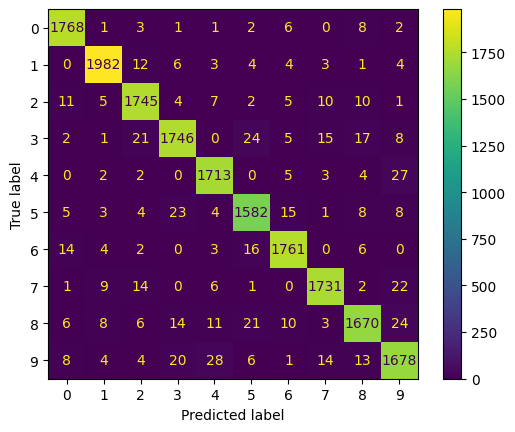

In [31]:
confusion_matrix_rf = confusion_matrix(y_valid, y_valid_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf)

cm_display.plot()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


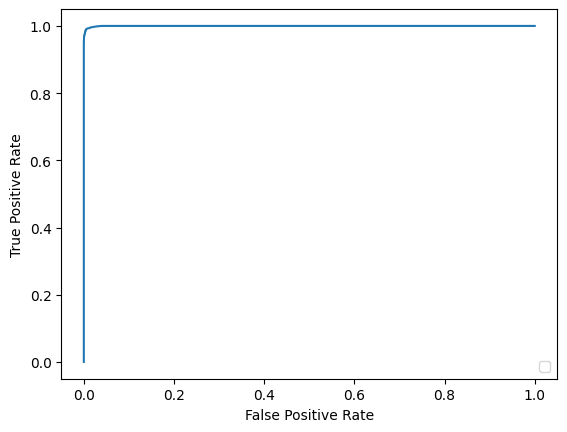

In [32]:
y_pred_proba_rf = grid_rf.predict_proba(x_valid)[:,1]
fpr, tpr, _ = roc_curve(y_valid,  y_pred_proba_rf,pos_label=1)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## XGBoost

In [33]:
xgb = XGBClassifier(
    max_depth=5,
    gamma=0,
    eta=0.5,
    reg_alpha=0.5,
    reg_lambda=0.5
)

xgb.fit(x_train,y_train)
xgb.score(x_valid,y_valid)

0.9732777777777778

In [34]:
y_valid_pred_xgb = xgb.predict(x_valid)

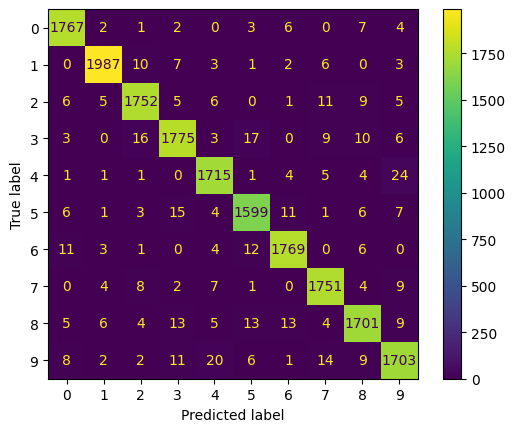

In [35]:
confusion_matrix_xgb = confusion_matrix(y_valid, y_valid_pred_xgb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_xgb)

cm_display.plot()
plt.show()

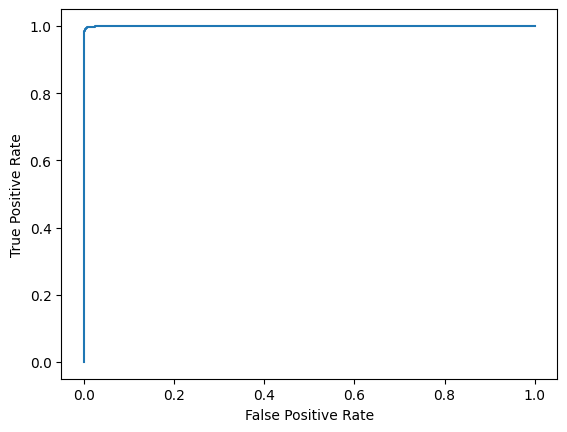

In [113]:
y_pred_proba_xgb = xgb.predict_proba(x_valid)[:,1]
fpr, tpr, _ = roc_curve(y_valid,  y_pred_proba_xgb,pos_label=1)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM

In [65]:
from sklearn import svm

In [118]:
svc = svm.SVC(C=0.5,kernel='rbf',probability=True)
svc.fit(x_train,y_train)
y_valid_pred_svc = svc.predict(x_valid)
accuracy_score(y_valid,y_valid_pred_svc)

0.9732222222222222

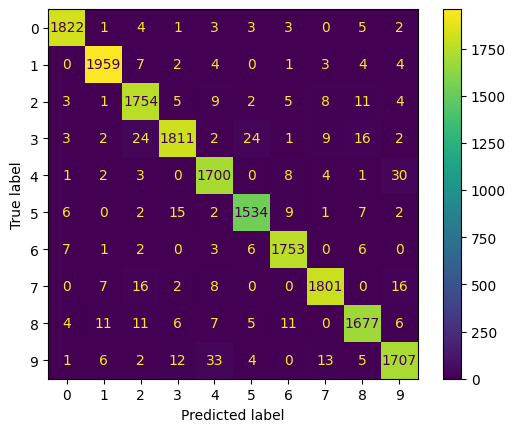

In [119]:
confusion_matrix_svc = confusion_matrix(y_valid, y_valid_pred_svc)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svc)

cm_display.plot()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


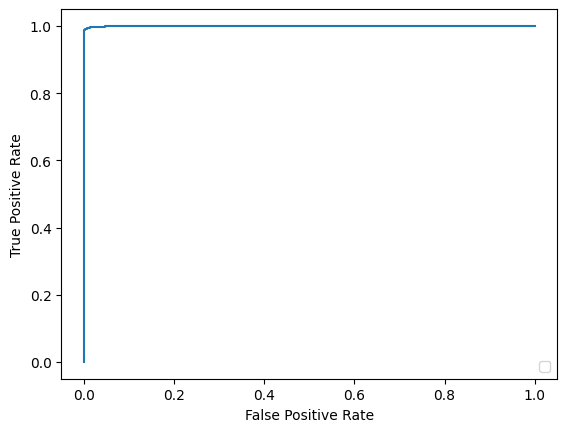

In [120]:
y_pred_proba_svc = svc.predict_proba(x_valid)[:,1]
fpr, tpr, _ = roc_curve(y_valid,  y_pred_proba_svc,pos_label=1)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

ِAfter reviewing the 4 models the 3 models (RandomForest,XGboost,SVM) svm , XGboost have the same accuracy and roc but Randomforest is near to them  but the XGboost need high requirments and SVM is too slow while Random forest is normal with good performarnce and roc so i see that the best is random forest

# Regularization

In [37]:
grid_rf.best_params_

{'regressor': RandomForestClassifier(),
 'regressor__criterion': 'gini',
 'regressor__n_estimators': 100}

In [97]:
rf = RandomForestClassifier(n_estimators=100,criterion='gini',max_features='log2',min_samples_split=4)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9999047619047619

In [98]:
rf.score(x_valid,y_valid)

0.9628888888888889

# Testing

In [92]:
x_test = mnist_test.drop(columns=['label']).copy()
y_test = mnist_test['label']

In [99]:
y_pred_test = rf.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.9647

In [100]:
y_pred_test_without_reg = grid_rf.predict(x_test)
accuracy_score(y_test,y_pred_test_without_reg)

0.9676